# Redes neuronales convolucionales (CNN)

## Fundamentos

Históricamente han sido el tipo de ANN más exitosa, usadas principalmente para reconocimiento de imágenes, localización de objetos y procesamiento de texto, entre otros.

Están inspiradas por el funcionamiento del cortex visual de los gatos, en donde porciones específicas del campo visual activan ciertas neuronas.

<center>
    <img src="figures/cnn-0.png" width="1000"/>
</center>

Están basadas en el concepto de la convolución entre dos funciones:

\begin{align}
    (f \ast g)(t) = \int_{-\infty}^\infty f(\tau) g(t - \tau) d\tau
\end{align}

<center>
    <img src="figures/convo-gif-1.gif" width="800"/>
</center>

<center>
    <img src="figures/convo-gif-3.gif" width="800"/>
</center>

## Aplicaciones comunes de las CNN

- Reconocimiento de rostros
- Conducción y producción autónoma
- Diagnóstico médico e industrial
- Sistemas de vigilancia
- Procesamiento de imágenes

# Arquitectura de las CNN



<center>
    <img src="figures/cnn-archi.jpg" width="800"/>
</center>




## Capas convolucionales

Intuitivamente la operación de convolución utiliza filtros (kernels) adecuados para detectar determinados patrones dentro de las imágenes.

<center>
    <img src="figures/convolution-2-gif.gif" width="800"/>
</center>

Sin embargo, algunos filtros son más abstractos y no tienen necesariamente una interpretación intuitiva.

Dada una capa $i$, los valores de la capa $i+1$ son el producto punto entre los valores (pesos) del filtro y regiones espaciales de la capa actual de igual dimensión

<center>
    <img src="figures/convolution-gif.gif" width="800"/>
</center>

Al resultado de la operación también se le puede aplicar una función de activación (e.g. ReLU).

Al aplicar más de un filtro a una misma capa, se pueden generar capas sucesivas tridimensionales.

<center>
    <img src="figures/convo-4.gif" width="600"/>
</center>

*Ej.: al aplicar 3 filtros de profundidad 1 a una capa de profundidad 1, se generará una capa de profundidad 3*


También existen filtros tridimensionales de profundidad determinada para aplicar a capas que ya son tridimensionales.

<center>
    <img src="figures/convo-5.gif" width="600"/>
</center>

*Ej.: al aplicar 1 filtro de profundidad 3 a una capa de profundidad 3, se generará una capa de profundidad 1*

En general, es posible aplicar cualquier cantidad de filtros de profundidad determinada a cualquier capa de cualquier otra profundidad.

<br><center>
    <img src="figures/convo-6.png" width="1000"/>
</center>

*Ej.: aplicar un filtro de 3x3x3 sobre una capa de 4x5x4 resulta en una capa de 2x3x2*


## Capas de submuestreo (pooling)

El submuestreo consiste en reducir la dimensionalidad de las capas convolucionales.

Se busca reducir el costo computacional, aumentar la tolerancia a pequeñas distorsiones y hacer la CNN lo más genérica posible.

<center>
    <img src="figures/pooling-2.jpeg" width="500"/>
</center>

Los tipos más comunes son el submuestreo promediado y submuestreo máximo.
- Average pooling: se van tomando promedios cada $a x b$ posiciones
- Max pooling: se van tomando el valor máximo cada $a x b$ posiciones

<center>
    <img src="figures/pooling-gif.gif" width="700"/>
</center>



## Capa totalmente conectada (fully connected) o densa

Luego de sucesivas capas convolucionales y de submuestreo se suele aplicar una capa totalmente conectada.

Esto se hace para ponderar toda la información presente en la capa anterior, que hasta el momento retenía la estructura espacial de la entrada original.

<center>
    <img src="figures/convo-9.png" width="1100"/>
</center>

## Capa softmax

Si la CNN se utiliza para clasificación, luego de la capa totalmente conectada se aplica una capa softmax para predecir las probabilidades para cada clase.

<center>
    <img src="figures/softmax.png" width="700"/>
</center>

## Capa de dilución (dropout)

Se trata de una capa especial usada durante el entrenamiento para prevenir el sobreajuste.

Consiste en aleatoriamente no considerar algunas unidades durante el entrenamiento.

<center>
    <img src="figures/dropout-1.png" width="700"/>
</center>

Con esta técnica se busca aumentar la capacidad de generalización de la red.

# Entrenamiento de una CNN



Durante el entrenamiento de la CNN, esta "aprende" a detectar atributos relevantes en los datos brutos

<center>
    <img src="figures/cnn-1.jpeg" width="1100"/>
</center>

Los atributos en las capas inferiores capturan formas primitivas como líneas, mientras que los atributos es capas superiores captan formas complejas.

Los parámetros (coeficientes, pesos) a aprender en las capas convolucionales corresponden a los valores de cada kernel o filtro cuyos valores se ajustan con propagación hacia atrás.

<center>
    <img src="figures/cnn-parameter.png" width="900"/>
</center>

Cada filtro también tiene asociado un termino de sesgo (bias, offset)

Por su funcionamiento jerarquico en encontrar atributos de bajo nivel y combinarlos para formar atributos de alto nivel, es posible utilizar CNN preentrenadas para distintos tipos de aplicaciones.


<center>
    <img src="figures/cnn-2.png" width="1200"/>
</center>

En estos casos solo se realiza un ajuste fino en la última capa de la CNN para adaptarla al caso en particular.

# Ejemplo: Arquitectura LeNet-5



Es una de las primeras arquitecturas de CNN preentrenadas para **reconocer texto**.

Consta de **3 capas convolucionales** combinadas son **submuestreo promedio**. Luego siguen capas **totalmente conectadas** y un clasificador **softmax**.

La entrada es una imagen de 32x32 pixeles en escala de grises, por lo que el número de canales (o profundidad) es 1.

<center>
    <img src="figures/lenet-1.png" width="200"/>
</center>

La primera convolución utiliza **6 filtros** de tamaño **5x5**.

Como resultado se obtiene un mapa de atributos de tamaño **28x28x6**.

<center>
    <img src="figures/lenet-2.png" width="900"/>
</center>

Aquí el número de canales es igual a la cantidad de filtros aplicados, osea **6**.



La primera operación de **submuestreo** (pooling) promedia los valores en regiones de **2x2**.

<center>
    <img src="figures/lenet-3.png" width="600"/>
</center>

Como resultado, se reduce el tamaño de los mapas de atributos a la mitad, pero el número de canales se mantiene igual.



Luego se vuelve a realizar otra convolución, otro submuestreo y otra convolución hasta llegar a un mapa de atributos lineal de 120 valores.

<center>
    <img src="figures/lenet-4.png" width="1000"/>
</center>

Finalmente se agrega una capa **totalmente conectada** con **84** unidades y una capa de clasificación **softmax** con **10** unidades.

<center>
    <img src="figures/lenet-5.png" width="1000"/>
</center>

Sin considerar la capa softmax, todas las demás capas utilizan la función de activación **tanh**.


<center>
    <img src="figures/lenet-gif.gif" width="1200"/>
</center>

# CNN para reconocimiento de dígitos

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17651825182565648754
xla_global_id: -1
]


In [2]:
from tensorflow.config import list_physical_devices
list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
# parametros de los datos
num_classes = 10
input_shape = (28, 28, 1)

# carga los datos y crea sets de entrenamiento y test
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


la clase verdadera es:  7


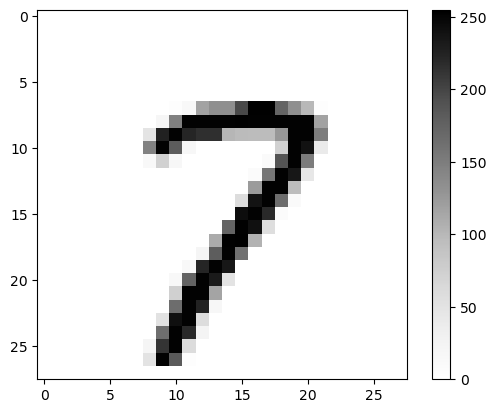

valor máximo en la imagen =  255


In [6]:
idx = 230
print('la clase verdadera es: ', y_train[idx])
plt.imshow(x_train[idx], cmap='Greys')
plt.colorbar()
plt.show()
print('valor máximo en la imagen = ', np.max(x_train[idx]))

In [7]:
# escala imagenes al rango 0-1 
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# asegurarse que las imagenes tengan tamaño 28x28x1
x_train = np.expand_dims(x_train, -1) #agrega dimension extra
x_test = np.expand_dims(x_test, -1) #agrega dimension extra
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
# transforma la variable objetivo en un vector de clases
print(y_train[idx])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_train[idx])

7
(60000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [9]:
model = keras.Sequential([keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(), layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
batch_size = 128
epochs = 10
#compila el modelo, definiendo solver, metrica y funcion de costo
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#comienza el entrenamiento
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 83ms/step - accuracy: 0.7643 - loss: 0.7552 - val_accuracy: 0.9797 - val_loss: 0.0790
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.9621 - loss: 0.1198 - val_accuracy: 0.9843 - val_loss: 0.0571
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 85ms/step - accuracy: 0.9722 - loss: 0.0917 - val_accuracy: 0.9863 - val_loss: 0.0474
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 87ms/step - accuracy: 0.9776 - loss: 0.0717 - val_accuracy: 0.9897 - val_loss: 0.0402
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.9818 - loss: 0.0586 - val_accuracy: 0.9885 - val_loss: 0.0376
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 35s 83ms/step - accuracy: 0.9823 - loss: 0.0561 - val_accuracy: 0.9893 - val_loss: 0.0358
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.9847 - loss: 0.0506 - val_accuracy: 0.9902 - val_loss: 0.0335
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.9853 - loss: 0.0467 - 

In [11]:
#evalua el modelo para datos de test
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.028945690020918846
Test accuracy: 0.9901000261306763


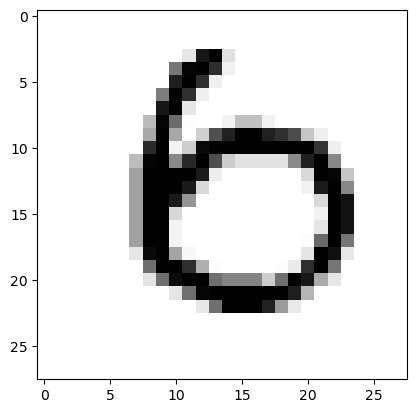

**la clase verdadera es:  6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
**la clase predicha es:  6


In [14]:
#verifica predicciones para algunos datos
idx = 259 #259
plt.imshow(x_test[idx], cmap='Greys')
plt.show()

print('**la clase verdadera es: ', np.argmax(y_test[idx]))

prediction = model.predict(np.expand_dims(x_test[idx], 0))
print('**la clase predicha es: ', np.argmax(prediction))

**Pero... ¿funciona realmente en la práctica?**

<br><center>
    <img src="figures/sus-1.png" width="500"/>
</center>


In [23]:
import PIL #modulo PILLOW para trabajar con imagenes 

im = PIL.Image.open("others/20241104_134742.jpg") #abre la imagen
im = im.rotate(-90)
im.show() #muestra la imagen en nueva ventana
im = im.resize((28, 28)) #redimensiona a 28x28 px
im = im.convert(mode="L") #pasa a escala de grises
im.show() #muestra la imagen en nueva ventana

In [24]:
imarr = np.asarray(im) #pasa la imagen a array
imarr = np.max(imarr) - imarr #invierte colores en el array
imarr = imarr/np.max(imarr) #normaliza en el rango 0-1
imarr = np.expand_dims(imarr, -1) #agrega la dimension de la profunidad al final

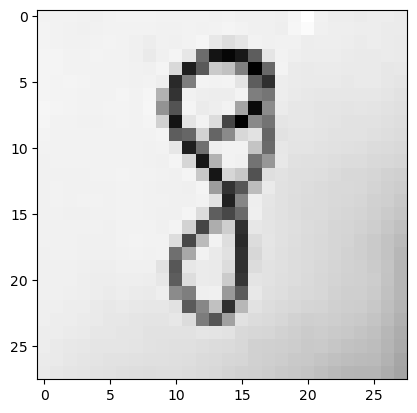

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
**la clase predicha es:  8


In [25]:
plt.imshow(imarr, cmap='Greys') #grafica la imagen en colores grises
plt.show()

imarr_one = np.expand_dims(imarr, 0) #crea un grupo de solo 1 imagen
myprediction = model.predict(imarr_one) #predice la imagen
print('**la clase predicha es: ', np.argmax(myprediction))

# Sumario
- El aprendizaje profundo se aprovecha de las repetidas composiciones de funciones no-lineales para encontrar patrones de estructura jerarquizada en los datos.
- Por su naturaleza, el entrenamiento de los modelos requieren de muchos más datos y tiempo de cálculo.
- Las CNN destacan por su habilidad en el ámbito del reconocimiento y análisis de imágenes.